In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import nonlinear_QM_FPJPA as Fs
import wx_programs as wx
import bnc
from generator import *
from hardware_config import *
from values import *
from qubit_class import *
import standard_sequences.pinopi as pnp
import daq.daq_programs_homo as daq
import standard_sequences.spectroscopy as spec
import standard_sequences.rabi as rabi
from analysis import *

In [2]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
print(f"{q1}\n{q2}")

Qubit(ge_ssm=-0.11, qubit_thr=[-5000, 5000], ef_ssm=-0.2525, ROq3=6.583064, IQ_angle=240, qubit_id=q1, ro_dur=5000, ge_time=52.35258023759522, RO_LO=6.6247, ro_amp=0.5, ef_amp=1, RO_LO_pwr=16, ge_amp=1.2, ro_freq=6.7275, ROIF=0.10280000000000022, ef_time=75.49998555048988)
Qubit(ge_ssm=-0.152, qubit_thr=[-5000, 5000], ef_ssm=-0.224, ROq3=6.583064, IQ_angle=220, qubit_id=q2, ro_dur=5000, ge_time=40.15374412400174, RO_LO=6.6247, ro_amp=0.5, ef_amp=1, RO_LO_pwr=16, ge_amp=1.2, ro_freq=6.65555, ROIF=0.030850000000000044, ef_time=None)


In [6]:
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
num_steps = 3
reps = 10000
sweep_time = 500

In [7]:
pnp.pi_nopi_ge(0, 0, q1, q2, gen_vals = general_vals_dict)
pnp.pi_nopi_ge(1, 1, q1,q2,gen_vals = general_vals_dict)

pnp.pi_nopi_ef(1,2,q1, q2, gen_vals = general_vals_dict)

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error


0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 10000
Buffers per acquistion: 10
DAQ samples per pattern: 8192
0, No error
Capturing 10 buffers. Press <enter> to abort
Capture completed in 3.883117 sec
Captured 10 buffers (2.575251 buffers per sec)
Captured 30720 records (7911.170411 records per sec)
Transferred 503316480 bytes (129616616.011454 bytes per sec)


<Figure size 800x800 with 0 Axes>

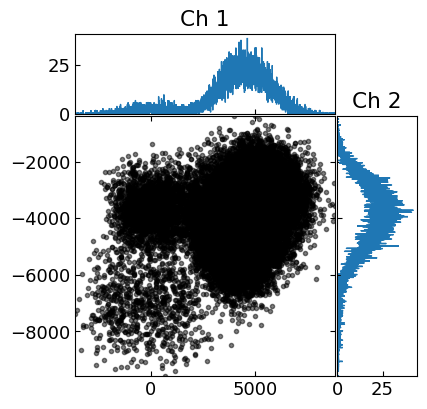

<Figure size 800x800 with 0 Axes>

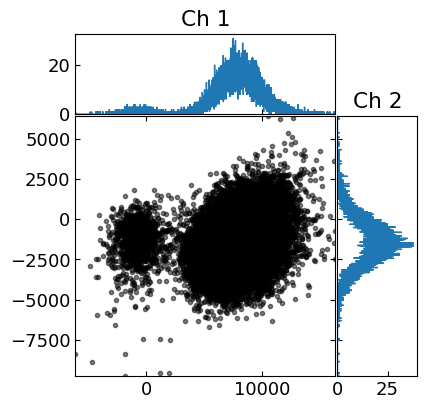

In [8]:
wx.wx_set_and_amplitude_and_offset(
    amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
)
values = daq.run_daq_het_2q(q1, q2,
                   num_patterns=num_steps, num_records_per_pattern=reps,
                    verbose=True)

I histogram


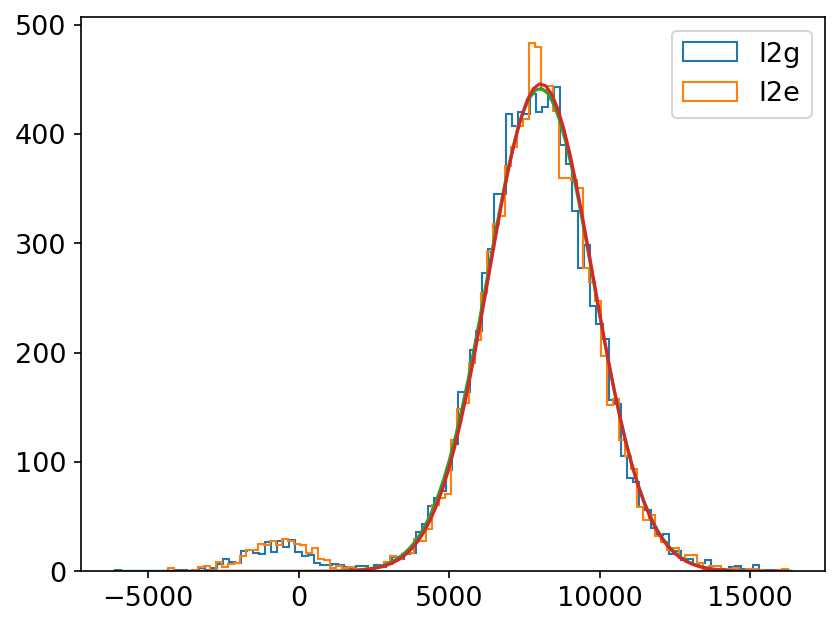

Q histogram


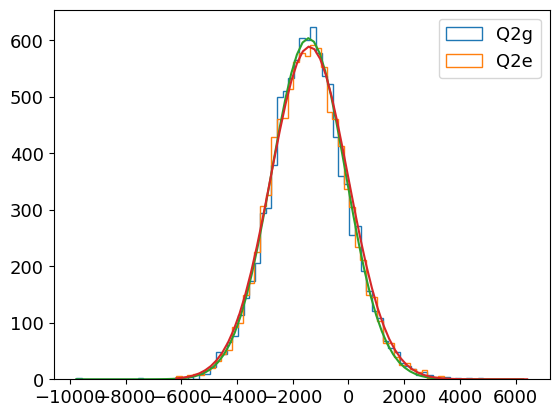

In [9]:
# IQ Histograms
def make_hist(IQdata, ax_hist,labelstr):
    binwidth = 200
    lim_IQ_min = np.min([IQdata])
    lim_IQ_max = np.max([IQdata])
    
    bins_IQ = np.arange(lim_IQ_min, lim_IQ_max, binwidth)
    
    counts_IQ = ax_hist.hist(IQdata, bins=bins_IQ, histtype='step', orientation='vertical', label = labelstr)[0]
    
    gauss_xaxis = np.linspace(lim_IQ_min,lim_IQ_max, len(counts_IQ))
    
    
    return bins_IQ,counts_IQ, gauss_xaxis

plt.figure(dpi = 150)
axI2= plt.axes()
print("I histogram")
bins_Ig2, counts_Ig2, gauss_xaxis_Ig2 = make_hist(values.rec_readout_vs_pats_2[0,:,0],axI2, 'I2g')
bins_Ie2, counts_Ie2, gauss_xaxis_Ie2 = make_hist(values.rec_readout_vs_pats_2[0,:,1],axI2, 'I2e')

_2, mu_Ig2, std_Ig2 =fit_gaussian_no_plot(values.rec_readout_vs_pats_2[0,:,0], gauss_xaxis_Ig2, counts_Ig2,axI2)

_2, mu_Ie2, std_Ie2 =fit_gaussian_no_plot(values.rec_readout_vs_pats_2[0,:,1], gauss_xaxis_Ie2, counts_Ie2,axI2)

axI2.legend()
plt.show()

axQ2= plt.axes()

print("Q histogram")
bins_Qg2, counts_Qg2, gauss_xaxis_Qg2 = make_hist(values.rec_readout_vs_pats_2[1,:,0],axQ2,'Q2g')
bins_Qe2, counts_Qe2, gauss_xaxis_Qe2 = make_hist(values.rec_readout_vs_pats_2[1,:,1],axQ2, 'Q2e')

_2, mu_Qg2, std_Qg2 =fit_gaussian_no_plot(values.rec_readout_vs_pats_2[1,:,0], gauss_xaxis_Qg2, counts_Qg2,axQ2)

_2, mu_Qe2, std_Qe2 =fit_gaussian_no_plot(values.rec_readout_vs_pats_2[1,:,1], gauss_xaxis_Qe2, counts_Qe2,axQ2)

axQ2.legend()
plt.show()